In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data
df = pd.read_csv('titanic_train.csv')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# to predict survival 
df=df.drop(columns=['Unnamed: 0' , 'PassengerId','Name' , 'Ticket' ,'Cabin'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [5]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# observation 
# 1) we see some problem in std of age
# 2) we see outlier in fare and age
# 3) age column has some missing value

In [8]:
# filling missing value
df['Age']=df['Age'].fillna(df['Age'].mean())

In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
# now  lets convert categorical data into numbers coz sex and embared also contrubute to label 

## using label encoder

from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

df2 = lab_enc.fit_transform(df['Sex'])

df2


array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [11]:
#ressign to original dataset
df['Sex'] = df2

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [13]:
# now for embarked first fill na with mode 

df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
# again using label encoder
df3 = lab_enc.fit_transform(df['Embarked'])

df3

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [16]:
#ressign to original dataset
df['Embarked'] = df3

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


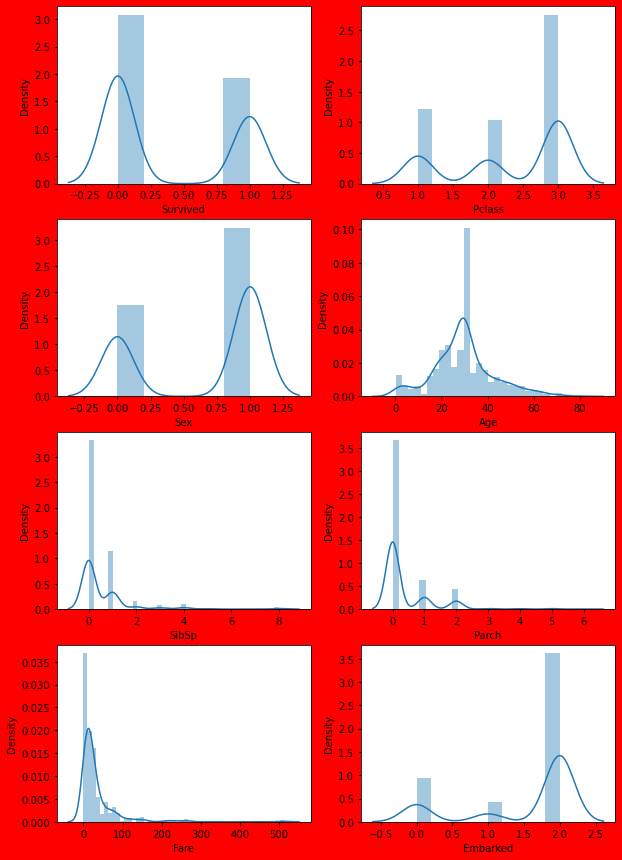

In [18]:
# lets see how data is distributed
plt.figure(figsize=(10,15) , facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber <= 8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    plotnumber += 1
plt.show()

In [19]:
#lets remove outlier
#from scipy.stats import zscore

In [20]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1

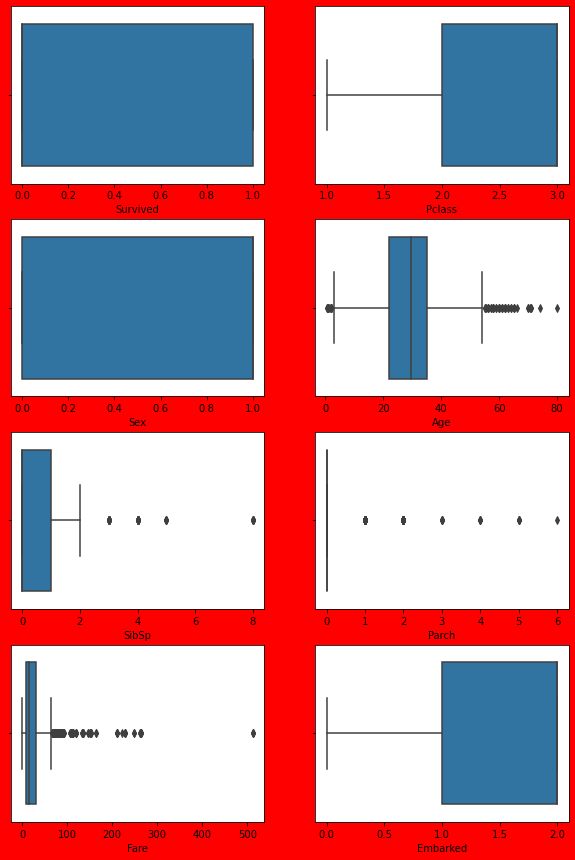

In [21]:
# lets see outlier
plt.figure(figsize=(10,15) , facecolor='red')
graph = 1

for column in df:
    if graph <= 8:
        plt.subplot(4,2,graph)
        ax=sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    graph += 1
plt.show()

In [22]:
# removing outlier using z score

In [23]:
#z_score=zscore(df[['Age','Fare']])
#abs_z_score=np.abs(z_score)
#filtering_entry=(abs_z_score < 3).all(axis=1)
#df=df[filtering_entry]
#df.describe()

In [24]:
# lets see how data is distributed
#plt.figure(figsize=(20,15) , facecolor='red')
#plotnumber = 1

#for column in df:
#    if plotnumber <= 6:
#        ax=plt.subplot(3,3,plotnumber)
#        sns.distplot(df[column])
#        plt.xlabel(column,fontsize=20)
        
#    plotnumber += 1
#plt.show()

In [25]:
#removing for fare coz its a skwed data
fare_high=(q3.Fare + (1.5*iqr.Fare))
fare_high

65.6344

In [26]:
outlier_high=np.where(df['Fare']>fare_high)
outlier_high

(array([  1,  27,  31,  34,  52,  61,  62,  72,  88, 102, 118, 120, 124,
        139, 151, 159, 180, 195, 201, 215, 218, 224, 230, 245, 256, 257,
        258, 262, 268, 269, 275, 290, 291, 297, 299, 305, 306, 307, 310,
        311, 318, 319, 324, 325, 332, 334, 336, 337, 341, 366, 369, 373,
        375, 377, 380, 385, 390, 393, 412, 435, 438, 445, 453, 484, 486,
        496, 498, 504, 505, 520, 527, 537, 540, 544, 550, 557, 558, 581,
        585, 587, 591, 609, 627, 641, 645, 655, 659, 660, 665, 679, 681,
        689, 698, 700, 708, 716, 730, 737, 741, 742, 745, 759, 763, 765,
        779, 789, 792, 802, 820, 829, 835, 846, 849, 856, 863, 879],
       dtype=int64),)

In [27]:
df=df.drop(df.index[outlier_high])
df.shape

(775, 8)

In [28]:
df.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,2
1,2,1,3,0,26.000000,0,0,7.9250,2
2,3,1,1,0,35.000000,1,0,53.1000,2
3,4,0,3,1,35.000000,0,0,8.0500,2
4,5,0,3,1,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...
770,886,0,2,1,27.000000,0,0,13.0000,2
771,887,1,1,0,19.000000,0,0,30.0000,2
772,888,0,3,0,29.699118,1,2,23.4500,2
773,889,1,1,1,26.000000,0,0,30.0000,0


In [29]:
#removing for age coz its a skwed data
age_high=(q3.Age + (1.5*iqr.Age))
age_high

54.5

In [30]:
outlier_high=np.where(df['Age']>age_high)
outlier_high

(array([ 10,  14,  30,  49,  85,  87, 106, 137, 154, 158, 209, 228, 249,
        282, 393, 404, 420, 422, 427, 428, 471, 480, 493, 543, 544, 547,
        562, 583, 593, 602, 668, 738], dtype=int64),)

In [31]:
df=df.drop(df.index[outlier_high])
df.shape

(743, 8)

In [32]:
df.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,2
1,2,1,3,0,26.000000,0,0,7.9250,2
2,3,1,1,0,35.000000,1,0,53.1000,2
3,4,0,3,1,35.000000,0,0,8.0500,2
4,5,0,3,1,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...
738,886,0,2,1,27.000000,0,0,13.0000,2
739,887,1,1,0,19.000000,0,0,30.0000,2
740,888,0,3,0,29.699118,1,2,23.4500,2
741,889,1,1,1,26.000000,0,0,30.0000,0


In [33]:
# for age low
age_low=(q1.Age - (1.5*iqr.Age))
age_low

2.5

In [34]:
outlier_low=np.where(df['Age']<age_low)
outlier_low

(array([  6,  13,  66, 101, 140, 147, 156, 176, 278, 312, 316, 390, 400,
        439, 532, 534, 624, 652, 664, 684, 687, 690], dtype=int64),)

In [35]:
df=df.drop(df.index[outlier_low])
df.shape

(721, 8)

In [36]:
df.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,2
1,2,1,3,0,26.000000,0,0,7.9250,2
2,3,1,1,0,35.000000,1,0,53.1000,2
3,4,0,3,1,35.000000,0,0,8.0500,2
4,5,0,3,1,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...,...,...
716,886,0,2,1,27.000000,0,0,13.0000,2
717,887,1,1,0,19.000000,0,0,30.0000,2
718,888,0,3,0,29.699118,1,2,23.4500,2
719,889,1,1,1,26.000000,0,0,30.0000,0


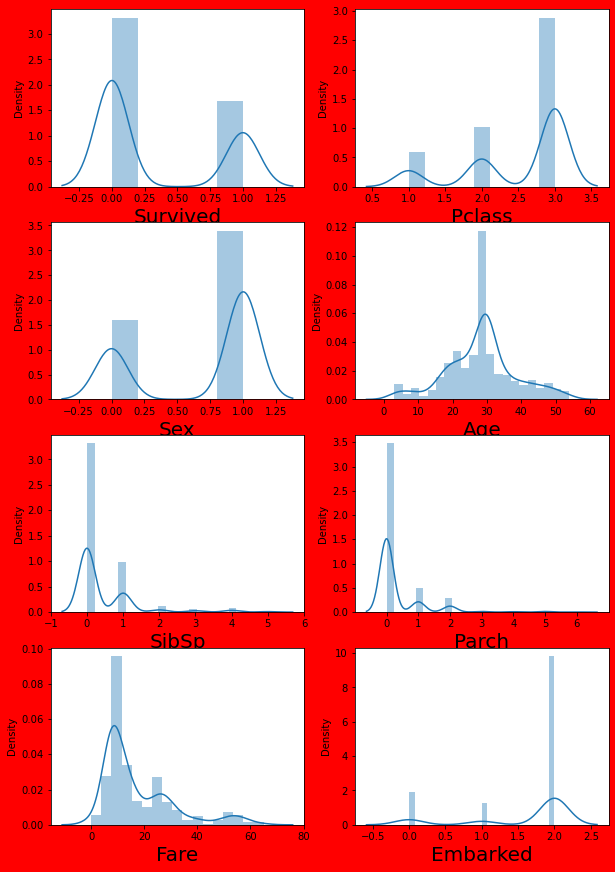

In [37]:
# lets see how data is distributed
plt.figure(figsize=(10,15) , facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber <= 8:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber += 1
plt.show()

In [38]:
# now data is ok so lets train the dataset 

X=df.drop(columns=['Survived'] ,axis=1)
y=df['Survived']

In [39]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
5,3,1,29.699118,0,0,8.4583,1
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [40]:
# scale the dataset
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaler=scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_scaler,y,test_size=0.25,random_state=355)

In [42]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [43]:
reg.score(X_train,y_train)

0.3776710642860608

In [44]:
reg.score(X_test,y_test)

0.22887543954594525

In [45]:
## LOGISTIC REGRESSION ##
from sklearn.linear_model import LogisticRegression

In [46]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [47]:
log_reg.predict(X_train)

array([0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [48]:
log_reg.score(X_train,y_train)

0.8055555555555556

In [49]:
log_reg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [50]:
log_reg.score(X_test,y_test)

0.7624309392265194

In [51]:
## KNN ###
from sklearn.neighbors import KNeighborsRegressor

In [52]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [53]:
knn.predict(X_train)

array([0.2, 0.8, 0. , 0.2, 0.2, 0.2, 0. , 0.6, 0. , 1. , 0.2, 0.2, 0.6,
       0.2, 1. , 1. , 0. , 0.2, 0.2, 0. , 0.8, 0. , 0.2, 0. , 0. , 0.6,
       0. , 0.6, 0.4, 0. , 0. , 0. , 0.6, 0.6, 0. , 1. , 0. , 0.2, 0.2,
       0.2, 0.8, 0.2, 1. , 0.2, 0. , 0.4, 1. , 0.4, 0. , 0.4, 0.2, 0.8,
       0.8, 1. , 0.6, 0. , 0.8, 0.2, 0.4, 0.2, 1. , 0. , 0. , 0.2, 0.2,
       0.2, 0.8, 1. , 0. , 0.4, 0.2, 0. , 0.2, 1. , 0.8, 0. , 0.2, 0.4,
       0.2, 0.4, 0. , 0.6, 0.2, 0.6, 0. , 0. , 0.6, 0.4, 0.2, 0.8, 0. ,
       0.8, 0.2, 0.4, 0.6, 0. , 0. , 0.2, 0.6, 0. , 0. , 0.2, 0. , 0.6,
       1. , 0. , 0.2, 0. , 0.8, 0.4, 0.4, 0.6, 0.4, 1. , 0.2, 0.8, 0.2,
       0. , 1. , 0. , 0.2, 0. , 1. , 0. , 0.6, 0. , 0. , 0.6, 0.4, 0.2,
       0. , 0.6, 0.2, 0.4, 0.2, 0.8, 0. , 0.2, 0.8, 0. , 1. , 0.2, 0.4,
       0.8, 0.8, 0.4, 0.2, 0.2, 0.2, 0.4, 0.6, 0. , 0.2, 0. , 1. , 0. ,
       0.6, 0. , 0.2, 0. , 0. , 0. , 0.6, 0. , 0.2, 0. , 0.4, 0. , 0.8,
       0.6, 0.4, 0. , 0.6, 0.2, 0. , 0.4, 0.8, 0.6, 0. , 0.6, 0.

In [54]:
knn.score(X_train,y_train)

0.5375841725761277

In [55]:
knn.predict(X_test)

array([0.2, 0.2, 0. , 0.2, 0.2, 0. , 1. , 0.4, 1. , 0.4, 0.4, 0.2, 0.2,
       1. , 0. , 0.4, 0. , 1. , 0.2, 0.2, 0.2, 0. , 0. , 0.8, 0. , 0. ,
       0.6, 0. , 0.2, 1. , 0. , 1. , 0. , 0. , 1. , 0. , 0.8, 0. , 1. ,
       0.2, 0. , 0.2, 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0.2, 0.8,
       0.8, 0.4, 0. , 0.8, 0.2, 0. , 1. , 1. , 1. , 0.2, 0.6, 0.6, 0. ,
       0.2, 0.2, 0. , 0. , 0.6, 0.2, 0. , 0.2, 0.2, 0. , 0.4, 0.2, 0. ,
       0. , 0.2, 0. , 0.2, 1. , 0. , 0. , 0. , 0.8, 0.4, 0. , 0.2, 0. ,
       0.2, 0.4, 0.2, 0.2, 0. , 1. , 1. , 0.2, 0.2, 0.8, 1. , 1. , 0. ,
       0. , 1. , 0.6, 0.8, 0. , 0.6, 0. , 0. , 0. , 0.2, 0. , 0.2, 0.4,
       0.2, 0. , 0. , 0.8, 0.8, 0. , 0.6, 0.2, 0.6, 0. , 0.6, 0.2, 0.2,
       0. , 0. , 0. , 0.4, 0.4, 0.2, 0.2, 0. , 0. , 0. , 0. , 0.8, 0.2,
       0.4, 0. , 0.2, 0.6, 1. , 0.4, 0. , 0.2, 0. , 1. , 0. , 0. , 0. ,
       0.2, 0.6, 0.2, 0. , 0. , 0. , 0.8, 0.2, 0. , 1. , 1. , 0.2, 0. ,
       0. , 0.2, 0. , 0.2, 0.6, 1. , 0. , 0.2, 0. , 0. , 0. , 0.

In [56]:
knn.score(X_test,y_test)

0.24107606679035232

In [57]:
### DECISION TREE ###
from sklearn.tree import DecisionTreeRegressor

In [58]:
dt=DecisionTreeRegressor()

In [59]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [60]:
dt.predict(X_train)

array([0.5       , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.85714286,
       1.        , 0.        , 0.        , 0.5       , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.16666667,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.16666667, 0.        , 1.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 0.5       ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.85714286, 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.     

In [61]:
dt.score(X_train,y_train)

0.9488579771340035

In [62]:
dt.predict(X_test)

array([0.        , 0.        , 0.        , 0.        , 0.5       ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.5       , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.16666667, 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.16666667,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.85714286,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.5       , 0.5       , 0.     

In [63]:
dt.score(X_test,y_test)

0.03165163715455266

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
grid_param = {'criterion':['gini' , 'entropy'],
             'max_depth' : range(1,15),
             'min_samples_leaf': range(1,9),
             'min_samples_split':range(3,10)
             }

In [66]:
grid_search = GridSearchCV(estimator=dt,param_grid=grid_param,n_jobs=-1)

In [67]:
grid_search.fit(X_train,y_train)

KeyError: 'gini'

In [ ]:
best_params=grid_search.best_params_

In [ ]:
print(best_params)

In [ ]:
DT = DecisionTreeRegressor(criterion= 'gini', max_depth= 1, min_samples_leaf= 1, min_samples_split= 3)

In [ ]:
DT.fit(X_train,y_train)

In [68]:
print (X_train)

[[-0.71037107  0.68660656  1.3474734  ... -0.41010323 -0.32388714
   0.53579727]
 [-2.10595021  0.68660656  0.12185853 ... -0.41010323  1.29929459
   0.53579727]
 [ 0.68520807  0.68660656 -0.84452604 ... -0.41010323 -0.70354934
   0.53579727]
 ...
 [ 0.68520807  0.68660656 -0.14707167 ... -0.41010323 -0.21659482
  -2.21373889]
 [-2.10595021  0.68660656 -0.04743533 ... -0.41010323  0.67584525
   0.53579727]
 [ 0.68520807  0.68660656  0.15183734 ... -0.41010323 -0.74966246
  -2.21373889]]


In [69]:
print (y_train)

149    0
351    0
91     0
213    0
233    1
      ..
64     0
363    0
620    0
430    1
798    0
Name: Survived, Length: 540, dtype: int64
